In [2]:
# %load /home/jonathan/.ipython/profile_default/startup/01-setup.py
# start up settings for jupyter notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, sys

plt.style.use('ggplot')
plt.rcParams['font.size'] = 15.0
plt.rcParams['axes.labelsize'] = 15.0
plt.rcParams['xtick.labelsize'] = 15.0
plt.rcParams['ytick.labelsize'] = 15.0
plt.rcParams['legend.fontsize'] = 15.0

%matplotlib inline

# set the max column width
pd.options.display.max_colwidth = 1000

# to avoid have warnings from chained assignments
pd.options.mode.chained_assignment = None


## No prune strategy

#### test_00.txt
- < 0.01s
- Set: 5
- Unset: 2

#### test_01.txt
- < 0.01s
- Set: 340
- Unset: 325

#### test_02.txt
- < 0.01s
- Set: 448
- Unset: 433

#### test_03.txt
- < 0.01s
- Set: 19
- Unset: 4

#### test_04.txt
- 0.26s
- Set: 1118936
- Unset: 1118936

#### test_05.txt
- < 0.01s
- Set: 79
- Unset: 14

#### test_06.txt
- 2:01.96
- Set: 558483250
- Unset: 558483190

### Sufficient prune strategy

#### test_00.txt
- < 0.01s
- Set: 5
- Set: 2

#### test_01.txt
- < 0.01s
- Set: 187
- Unset: 172

#### test_02.txt
- < 0.01s
- Set: 215
- Unset: 200

#### test_03.txt
- < 0.01s
- Set: 19
- Unset: 4

#### test_04.txt
- 0.02s
- Set: 21788
- Unset: 21788

#### test_05.txt
- < 0.01s
- Set: 67
- Unset: 2

#### test_06.txt
- < 0.01s
- Set: 251
- Unset: 191

In [43]:
mat = [6, 30, 30, 30, 56, 130, 120]
constr = [7, 17, 13, 18, 26, 14, 33]

none_strat = [0, 0, 0, 0, 0, 0, 121]
none_unset = [2, 325, 433, 4, 1118936, 14, 558483190]

suff_strat = [0, 0, 0, 0, 0.02, 0, 0]
suff_unset = [2, 172, 200, 4, 21788, 2, 191]

none_df = pd.DataFrame({
    'constraint': constr,
    'size': mat,
    'time': none_strat,
    'unset': none_unset
}, columns = ['constraint', 'size', 'time', 'unset'])

suff_df = pd.DataFrame({
    'constraint': constr,
    'size': mat,
    'time': suff_strat,
    'unset': suff_unset
}, columns = ['constraint', 'size', 'time', 'unset'])

none_df = none_df.drop(4, axis='index')
suff_df = suff_df.drop(4, axis='index')

In [46]:
suff_df

,constraint,size,time,unset
0,7,6,0.0,2
1,17,30,0.0,172
2,13,30,0.0,200
3,18,30,0.0,4
5,14,130,0.0,2
6,33,120,0.0,191


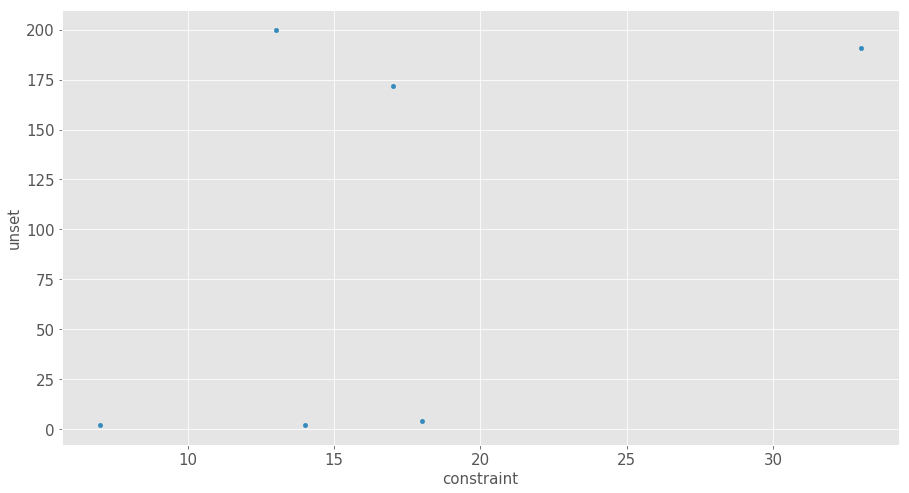

In [45]:
fig, ax = plt.subplots(figsize=(15, 8))

suff_df.plot(x='constraint', y='unset', kind='scatter', ax=ax);